<a href="https://www.youtube.com/watch?v=7j5sh5CUr1Y&list=PLxqBkZuBynVS8mDTc8ZGermXiS-32pR2y&index=43&ab_channel=Rohan-Paul-AI"><h1 style="font-size:250%; font-family:cursive; color:#ff6666;"><b>Link YouTube Video - Polynomial Regression From Scratch </b></h1></a>

[![IMAGE ALT TEXT](https://imgur.com/wvOy7IQ.png)](https://www.youtube.com/watch?v=7j5sh5CUr1Y&list=PLxqBkZuBynVS8mDTc8ZGermXiS-32pR2y&index=43&ab_channel=Rohan-Paul-AI)

----------------



Polynomial regression is a type of regression analysis in machine learning that models the relationship between the independent variable (input) and the dependent variable (output) as a polynomial function. It extends the concept of linear regression by introducing higher-order terms of the independent variable.

The general equation for polynomial regression with a single independent variable is:



## $$ y = β0 + β1x + β2x^2 + β3x^3 + ... + βn*x^n $$



Polynomial regression can be considered an instance of multiple linear regression. Instead of fitting a straight line or a hyperplane, polynomial regression fits a curve or a surface to the data points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

X = np.random.rand(1000,1)

y = 5*((X)**(2)) + np.random.rand(1000,1)


<div style="background: linear-gradient(45deg, #FFC300, #FF5733, #C70039, #900C3F); padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h3 style="font-weight: bold; color: white; margin: 0 auto;"> Loss function (Mean squared error )</h3>
</div>



In [3]:
def loss_function(y_true, y_hat):
    """
    This function calculates the Mean Squared Error (MSE) loss between the true values and the predictions. 
    It is commonly used in regression problems.
    
    Parameters
    ----------
    y : numpy.ndarray
        The true/target values. It should be a 1-D array of real values.
        
    y_hat : numpy.ndarray
        The predicted values, also known as the hypothesis. It should be a 1-D array of real values of 
        the same length as 'y'.
        
    Returns
    -------
    float
        The mean squared error loss between the true and predicted values.
    """   
    
    loss = np.mean((y_hat - y_true)**2)
    
    return loss




<div style="background: linear-gradient(45deg, #FFC300, #FF5733, #C70039, #900C3F); padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h3 style="font-weight: bold; color: white; margin: 0 auto;"> Function to calculate gradients</h3>
</div>

In [4]:
def calculate_gradients(X, y_true, y_pred):
    """
    This function calculates the gradients of the loss function with respect to the weights and bias. 
    This is used in the backpropagation step of gradient descent optimization algorithms.
    
    Parameters
    ----------
    X : numpy.ndarray
        The input data. It should be a 2-D array where each row is a sample and each column is a feature.
        
    y_true : numpy.ndarray
        The true/target values. It should be a 1-D array of real values.
        
    y_pred : numpy.ndarray
        The predicted values, also known as the hypothesis. It should be a 1-D array of real values of 
        the same length as 'y_true'.
        
    Returns
    -------
    dw : numpy.ndarray
        The gradient of the loss with respect to the weights. It is of the same shape as the weights.
        
    db : float
        The gradient of the loss with respect to the bias. It is a single float number.
    """

    # num_rows represents the number of training examples.
    num_rows = X.shape[0]
    
    # Gradient of loss with respect to weights (dw).
    # This is calculated by taking the dot product of the transpose of X with the difference of the predicted and true values,
    # and scaling by 1/num_rows.
    dw = (1/num_rows)*np.dot(X.T, (y_pred - y_true))
    
    # Gradient of loss with respect to bias (db).
    # This is calculated by summing up the difference of the predicted and true values, and scaling by 1/num_rows.
    db = (1/num_rows)*np.sum((y_pred - y_true)) 
    
    return dw, db

## Vectorized formula to compute the gradient of the loss with respect to the weights using the mean squared error (MSE) loss. 

Assuming X is the input matrix of shape (num_rows, n) i.e. (num_samples, num_features), y_true is the target values vector of shape (num_rows, 1), and y_hat is the predicted values vector of shape (num_rows, 1), the vectorized formula for the gradient is as follows:

`dw = (1/num_rows)*np.dot(X.T, (y_pred - y_true))`

The difference (y_hat - y_true) is a vector (with shape [num_rows, 1]), representing the errors of the predictions.
The dot product of the transpose of X (with shape [n, num_rows]) and the errors vector results in a vector (with shape [n, 1]) which represents the gradient of the loss with respect to the weights.

`dw = (1/num_rows)*np.dot(X.T, (y_pred - y_true))`


These gradients are used to update the weights and the bias in the opposite direction of the gradient to minimize the loss during the training of the model.

## Function to add features to input data

In [5]:
def create_polynomial_feature_set(X, degrees):
    """
    This function is used to transform the input data by adding higher degree features. This is useful in the context
    of Polynomial regression where the relationship between the independent and dependent variables is modeled as an
    nth degree polynomial.
    
    For example, suppose we have one feature (X) and we want to do a 2nd degree polynomial regression. We transform X into [X, X^2]
    
    If we had chosen degrees to be [2, 3], the transformed X would have been [X, X^2, X^3].

    Parameters
    ----------
    X : numpy.ndarray
        The input data, where each row is a data point and each column represents a feature.
        
    degrees : list of int
        The degrees for which we want to add features. Each value in this list will add a new feature
        to the input data where the values of the new feature are the values of the original feature raised
        to the power of the degree.

    Returns
    -------
    numpy.ndarray
        The transformed data with additional polynomial features.
        
    """
    
    # Making a copy of the original input data
    t = X.copy()
    
    # For each specified degree, we create a new feature where the values are the values of the original
    # feature raised to the power of the degree, and append this new feature to the input data.
    for i in degrees:
        X = np.append(X, t**i, axis=1)
            
    return X


## Training Function

In [6]:
def train(X, y, batch_size, degrees, epochs, lr):
    
    """
    Function to perform polynomial regression from scratch.
    
    Parameters:
    X (numpy.ndarray): The input features, a 2D array of size (number of examples, number of features).
    y (numpy.ndarray): The true/target values, a 1D array of size (number of examples).
    batch_size (int): The size of the batch to be used for batch gradient descent.
    degrees (list): List of degrees for polynomial features to be created.
    epochs (int): Number of iterations to train the model.
    lr (float): The learning rate for the model.
    
    Returns:
    w (numpy.ndarray): The learned weights of the model.
    b (float): The learned bias of the model.
    losses (list): List of losses computed at each epoch.
    """
    
    # Creating features to input X.
    x = create_polynomial_feature_set(X, degrees)
    
    # m-> number of training examples
    # n-> number of features 
    m, n = x.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//batch_size + 1):
            
            # Defining batches.
            start_i = i*batch_size
            end_i = start_i + batch_size
            x_batch = x[start_i:end_i]
            y_batch = y[start_i:end_i]
            
            # Calculating hypothesis
            y_hat = np.dot(x_batch, w) + b
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = calculate_gradients(x_batch, y_batch, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss_function(y, np.dot(x, w) + b)
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses


<div style="background: linear-gradient(45deg, #FFC300, #FF5733, #C70039, #900C3F); padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h3 style="font-weight: bold; color: white; margin: 0 auto;"> Predict Function </h3>
</div>


In [7]:
def predict(X, w, b, degrees):
    
    """
    Predicts the output using Polynomial Regression.

    Parameters:
        X (numpy array): Input data.
        w (numpy array): Weights (parameters) for each feature.
        b (float): Bias (parameter).
        degrees (list): List of degrees. Add X^(value) feature to the input
                        where value is one of the values in the list.

    Returns:
        numpy array: Predicted values.

    """
    
    # Adding featurs with degrees to input X.
    x1 = create_polynomial_feature_set(X, degrees)
    
    # Returning predictions.
    return np.dot(x1, w) + b

<div style="background: linear-gradient(45deg, #FFC300, #FF5733, #C70039, #900C3F); padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h3 style="font-weight: bold; color: white; margin: 0 auto;"> Training and Plotting Predictions </h3>
</div>

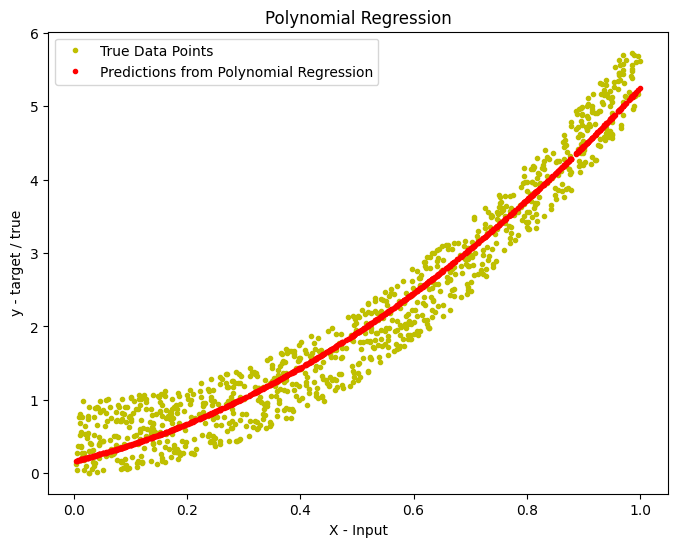

In [8]:
w_trained, b_trained, losses_trained = train(X, y, batch_size=100, degrees=[2], epochs=1000,
                lr=0.01)
y_hat = predict(X, w_trained, b_trained, [2])

# Plotting
fig = plt.figure(figsize=(8,6))

plt.plot(X, y, 'y.')

plt.plot(X, y_hat, 'r.')

plt.legend(["True Data Points", "Predictions from Polynomial Regression"])

plt.xlabel('X - Input')

plt.ylabel('y - target / true')

plt.title('Polynomial Regression')

plt.show()


## r2 Score

R² = 1 - (SSR / SST)
Where:

- SSR (Sum of Squared Residuals) is the sum of the squared differences between the predicted values and the actual values.

- SST (Total Sum of Squares) is the sum of the squared differences between the actual values and the mean of the dependent variable.


### Alternatively, the formula can also be expressed using the explained sum of squares (SSE) and total sum of squares (TSS):

## $$ R² = 1 - (SSE / TSS) $$ 

Where:

- SSE (Explained Sum of Squares) is the sum of the squared differences between the predicted values and the mean of the dependent variable.

- TSS (Total Sum of Squares) is the sum of the squared differences between the actual values and the mean of the dependent variable.


In both formulations, R² ranges from 0 to 1. A higher R-squared value indicates a better fit of the regression model to the data, where 1 indicates a perfect fit and 0 indicates that the model does not explain any of the variance in the dependent variable. 



In [9]:
def r2_score(y, y_hat):
    """ - SSE (Explained Sum of Squares) is the sum of the squared differences between the predicted values and the mean of the dependent variable.

    - TSS (Total Sum of Squares) is the sum of the squared differences between the actual values and the mean of the dependent variable. 
    
    R² = 1 - (SSE / TSS)
    
    """
    sse = np.sum((np.array(y_hat)-np.array(y))**2)
    tss = np.sum((np.array(y)-np.mean(np.array(y)))**2)
    return 1 - (sse / tss )


In [10]:
y_pred = predict(X, w_trained, b_trained, [2])

r2_score(y, y_pred)

0.9551785719360419